# Lab 1: Multiple Hypothesis Testing
Welcome to the first DS102 lab! 

The goals of this lab are to get familiar with multiple hypothesis testing scenarios, as well as to investigate several procedures for controlling the number of false discoveries.

The code you need to write is commented out with a message "TODO: fill in". There is additional documentation for each part as you go along.


## Course Policies

**Collaboration Policy**

Data science is a collaborative activity. While you may talk with others about the labs, we ask that you **write your solutions individually**. If you do discuss the assignments with others please **include their names** in the cell below.

**Submission**: to submit this assignment, rerun the notebook from scratch (by selecting Kernel > Restart & Run all), and then print as a pdf (File > download as > pdf) and submit it to Gradescope.


**This assignment should be completed and submitted before Sunday September 15, 2019 at 11:59 PM.** Note that for future labs, the lab will be due the day of your lab section at 11:59 PM. There are two ways to earn full credit in the weekly lab.
1. Attend your own assigned lab section and make progress substantial enough for your work to be checked off by course staff. Before you leave, you need to submit the lab to gradescope and have a staff member check you off. Even if you finish the lab notebook before your lab, you must attend the lab to be checked off. Note that your submitted work need not be complete in order to receive full credit if you were checked off.
2. Complete the lab on your own and submit the completed lab by the due date. If you choose this route, you must finish the entire lab and pass all autograder tests to receive credit. Because missing lab means missing group discussion of important course concepts, we recommend that you don't use this option except in weeks when you are physically unable to come to lab. If you have finished your lab early, you can still attend and participate in the discussion.

# Collaborators
Write names of your collaborators in this cell.

# Setup
Let's begin by importing the libraries we will use. You can find the documentation for the libraries here:
* matplotlib: https://matplotlib.org/3.1.1/contents.html
* numpy: https://docs.scipy.org/doc/
* pandas: https://pandas.pydata.org/pandas-docs/stable/
* seaborn: https://seaborn.pydata.org/

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats
%matplotlib inline

# 1) Distribution of p-values under the null and alternative hypotheses

The first part of this assignment looks at the distribution of p-values. We will define a null distribution as the normal distribution with mean $0$ and variance $1$. First, we will draw 1000 instances from this distribution, and investigate the distribution of p-values that result from a Z-test on these scores. Then, in part b, we will repeat the same procedure, but for data drawn from an alternative distribution. In part c you will summarize your findings.

We'll consider draws from the null distribution:
$$ D_0: \mathcal{N}(0,1)$$
as well as from an alternative distribution:
$$ D_1: \mathcal{N}(2,1)$$
In part (2), we'll disambiguate whether the random draws we see are generated from $D_0$ or $D_1$, using the p-values of each draw. Specifically, we'll use p-values from a one-sided test, such that the p-value of an observed value $x_i$ is the probability that a random value $x'$ drawn from $D_0$ has a value equal or larger to $x_i$the that value:
$$ P(x' \geq x_i \, |\, x' \sim D_0)$$


The following function will calculate the p-values for you, when you provide the mean and standard deviation of the null distribution. All you need to do there is run the cell so it gets instantiated.

In [3]:
# This function is written written for you, we'll use one-sided hypothesis tests
def calculate_p_values(x, mean_0, stdev_0):
    # for a one sided test, with h_1: mu > mean_0
    z_scores = (x - mean_0)/stdev_0
    return 1 - scipy.stats.norm.cdf(z_scores)

In part (1), we investigate the distribution of p-values for draws from the null distribution and from the alternative distribuation.

## 1a) plot the distribution of p-values for 1000 random draws that actually come from the null distribution: 
 $$ x_i \sim \mathcal{N}(0, 1) $$

Text(0.5, 1.0, 'distribution of p-values for data drawn from the null distribution')

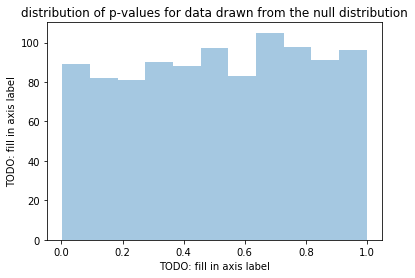

In [6]:
# generate n draws from the normal distribution with mean mu_0 and variance sigma_0 = 1
mu_a = 0
sigma_a = 1
n = 1000

# define the random state
rs = np.random.RandomState(0)

# x_a is an n-dimensional vector with each draw equal to x_i defined aboce.
x_a = sigma_a * rs.randn(n) + mu_a

# plot the distribution of p-values for each draw
p_values = calculate_p_values(x_a, mean_0=mu_a, stdev_0 = sigma_a)

sns.distplot(p_values, kde=False)

# TODO: fill in axes labels
plt.xlabel("TODO: fill in axis label")
plt.ylabel("TODO: fill in axis label")
plt.title("distribution of p-values for data drawn from the null distribution")

## 1b) plot the distribution of p-values for 1000 random draws that actually come from an alternative distribution:
 $$ x_i \sim \mathcal{N}(2, 1) $$

Text(0.5, 1.0, 'distribution of p-values for data drawn from the alternative distribution')

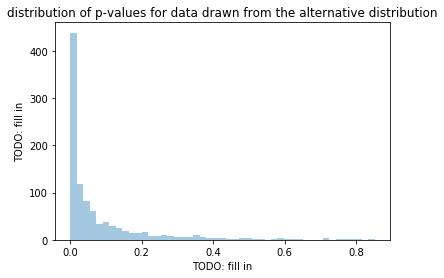

In [7]:
# draw for a different distribution
mu_b = 2
sigma_b = 1
n = 1000
rs = np.random.RandomState(0)

# x in an n_0-dimensional vector
x_b = sigma_b * rs.randn(n) + mu_b

# plot the distribution of p-values for each draw (recall that H_0 is defined by N(0,1))
p_values_b = # TODO: fill in

sns.distplot(p_values_b, kde=False)
plt.xlabel("TODO: fill in")
plt.ylabel("TODO: fill in")
plt.title("distribution of p-values for data drawn from the alternative distribution")

## 1c) What do you notice?





TODO: fill in (<=2 sentences) of your observations. 

Note that in the decision-making setting, all we see is the combined distribution for draws from (0) and from (1), but not their designated labels. In what follows we will look at different methods for trying to match instances from (1) to declared "discoveries" using the p-values. As the histogram of p-values above shows, there will in general be mistakes. We would like to specifically control the number of false discoveries reported.

# 2) Procedures to control False Discovery

This question looks at controlling the probability of false discoveries in a decision-making process for multiple hypothesis testing. In particular, we will implement three methods for making discoveries,
    1. naive p-values (ignoring that multiple testing is happening)
    2. Bonferroni-corrected  p-values to account for multiple testing
    3. The Benjamini-Hochberg procdure for multiple testing
    
    
For each method, we will assess the decisions made on a simulated data set. 



Text(0.5, 1.0, 'p-value distributions')

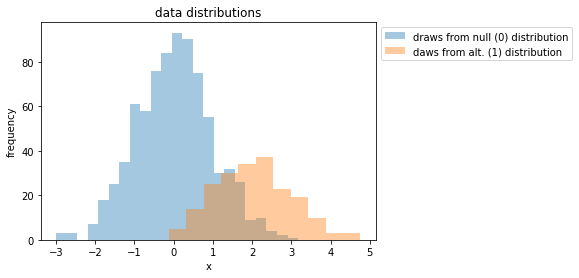

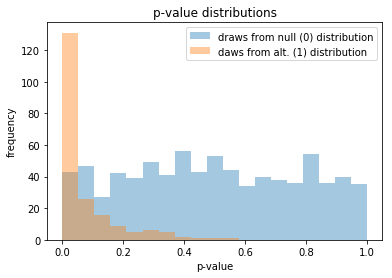

In [4]:
# NOTE: you just need to run this cell to instantiate variables; don't change this code.

rs = np.random.RandomState(0)
n = 1000

# roughly 90% of the data comes from the null distirubtion, 
true_values = rs.binomial(1, 0.2, 1000) 
# null distribution is N(0,1) and alternative distribution is N(2,1)
x_obs= rs.randn(n) + 2 * true_values

plt.figure()
sns.distplot(x_obs[true_values == 0],  label="draws from null (0) distribution", kde=False)
sns.distplot(x_obs[true_values == 1],  label="daws from alt. (1) distribution", kde=False)
plt.xlabel("x")
plt.ylabel("frequency")
plt.title("data distributions")
plt.legend(bbox_to_anchor=(1,1))

# NOTE: you just need to run this cell and understand what it does; no code to modify or write here. 
# set alpha 
alpha = 0.05

# calculate the p-values for each individual hypothesis
p_values = calculate_p_values(x_obs, mean_0=0, stdev_0 = 1)

plt.figure()
bins = np.linspace(0,1,num=20)
sns.distplot(p_values[true_values == 0],  label="draws from null (0) distribution", kde=False, bins=bins)
sns.distplot(p_values[true_values == 1],  label="daws from alt. (1) distribution", kde=False,bins=bins)
plt.legend(bbox_to_anchor=(1,1))
plt.xlabel("p-value")
plt.ylabel("frequency")
plt.title("p-value distributions")

## 2a) Fill in the following functions regarding confusion matrices.

These functions will be important for reporting your results in a standardized way; later code assumes that you have implemented them so please do start here.

In [5]:
def report_results(predicted_discoveries, truth):
    # input: predicted discoveries: n-dimensional array of 0/1 values where 1 indicates a "discovery"
    #        truth: n-dimensional array of 0/1 values where 1 indicates a draw from the altertanative
    
    # populate the following dictionary with COUNTS:
    # TODO: fill in each of these counts
    TP_count = # TODO: fill in
    TN_count = # TODO: fill in
    FP_count = # TODO: fill in
    FN_count = # TODO: fill in
    
    results_dictionary = {"TN_count": TN_count,
                          "TP_count": TP_count,
                          "FN_count": FN_count,
                          "FP_count": FP_count,
                         }
    
    # this function is defined for you below; this will make your life easier in a few steps.
    print_confusion_matrix(results_dictionary)
    return results_dictionary

def print_false_discovery_fraction(results_dictionary):
    # the results_dictionary object is defined via the output of report_results()
    
    # TODO: fill in - compute the false discovery fraction from the results dictionary
    total_predicted_discoveries = # TODO: fill in
    false_discovery_frac = # TODO: fill in
    
    # leave this printing functions as they are; you will need them later
    print("total discoveries: {0}".format(total_predicted_discoveries))
    print("fraction of discoveries which were actually false: {0:.3f}".format(false_discovery_frac))
    return total_predicted_discoveries, false_discovery_frac



def print_confusion_matrix(res_dict):
    # This is a helper function to print the confusion matrix. You don't need to modify this code.
    results_df = pd.DataFrame(data = {"Decision = 0": [res_dict['TN_count'], res_dict['FN_count']], 
                                      "Decision = 1":  [res_dict['FP_count'], res_dict['TP_count']]},
                             index=["Truth = 0", "Truth = 1"])
    print(results_df)


SyntaxError: invalid syntax (<ipython-input-5-e898869b3c68>, line 7)

 ### 2b) Naive thresholding
Here we will investigate the result of using the threshold $\alpha = 0.05$ to test each hypothesis independently, ignoring that we are in a multiple testing scenario. 

Fill in the code for the function below to test each hypothesis at significance level $\alpha$.

In [ ]:
def naive_alpha_threshold(p_values, alpha):
    # returns decisions: a binary vector of the same length as p-values, 
    # where decisions[i] is 1 if p_values[i] is deemed significant at level alpha, and 0 otherwize
    
    # TODO: fill in
    decisions = #
    return decisions

In [ ]:
# Once you've filled in naive_alpha_threshold(),  run this cell to print the results. 
naive_decisions = naive_alpha_threshold(p_values, alpha)

results = report_results(naive_decisions,true_values)
print()
print_false_discovery_fraction(results)


 ### 2c) Bonferroni
Here we will investigate the result of using Bonferroni-corrected p-values to declare discoveries.
First, implement the Bonfreroni procedure in the function below. 

Recall that for testing $n$ hypotheses with total signifcance $\alpha$, the resulting procedure is to test each hypothesis with significance $\frac{\alpha}{n}$.

In [ ]:
def bonferroni(p_values, alpha_tot):
    # returns the decisions made from the bonferroni correction procedure
    
    # TODO: fill in
    decisions = #
    
    return decisions

In [ ]:
# Once you've filled in bonferroni(), just run this cell to print the results. 
bonferroni_decisions = bonferroni(p_values, alpha)

results = report_results(bonferroni_decisions,true_values)
print()
print_false_discovery_fraction(results)


 ### 2d) Benjamini-Hochberg
Now we will investigate the result of implementing Benjamini-Hochberg procedure for multiple hypothesis testing.
First, implement the Benjamini-Hochberg procedure in the function below. 

Recall that for testing $n$ hypotheses with total signifcance $\alpha$, the resulting procedure is to find the largest $k$ such that the $k^{th}$-largest of the n p-values is less than or equal to $k \frac{\alpha}{n}$:
$$ P_{(k)} \leq k \frac{\alpha}{n}$$
We then declare a discovery for all p-values with lesser or equal value to this $k^{th}$ p-value. 

In [ ]:
 def benjamini_hochberg(p_values, alpha):
    # returns decisions: a binary vector of the same length as p-values, 
    # where decisions[i] is 1 if p_values[i] is deemed significant at level alpha, and 0 otherwize
    
    # TODO: fill in
    decisions = #
    
    return decisions
    

Now, asses the result of applying the Benjamini Hochberg procedure to the simulated data.

In [ ]:
# Once you've filled in benjamini_hochberg(), just run this cell to print the results.
bh_decisions = benjamini_hochberg(p_values, alpha)

bh_results = report_results(bh_decisions,true_values)
print()

print_false_discovery_fraction(bh_results)


### 2e) Conclusions

Finally, write a short (<= 4 sentences) summary comparing the three different methods from this problem.

TODO: fill in your comparison.

## Final tests
If all the tests below pass you can assume you have successfuly completed the testable parts of the lab. Don't worry about understanding the code below, you just need to make sure no asserts fail.

In [ ]:
import hashlib
import sys

def assert_discoveries(results,
                       true_vales,
                       true_positives_hash,
                       false_positives_hash,
                       true_negatives_hash,
                       false_negatives_hash,
                       false_discovery_frac_hash):
    def get_hash(num):
        return hashlib.md5(str(num).encode()).hexdigest()
    res_dict = report_results(results, true_values)
    assert(get_hash(res_dict['TP_count']) == true_positives_hash)
    assert(get_hash(res_dict['FP_count']) == false_positives_hash)
    assert(get_hash(res_dict['TN_count']) == true_negatives_hash)
    assert(get_hash(res_dict['FN_count']) == false_negatives_hash)
    _, false_discovery_frac = print_false_discovery_fraction(res_dict)
    print(false_discovery_frac)
    print(get_hash(false_discovery_frac))
    assert(get_hash(false_discovery_frac) == false_discovery_frac_hash)


assert_discoveries(naive_decisions,
                   true_values,
                   true_positives_hash="9b8619251a19057cff70779273e95aa6",
                   false_positives_hash="a1d0c6e83f027327d8461063f4ac58a6",
                   true_negatives_hash="ccb0989662211f61edae2e26d58ea92f",
                    false_negatives_hash="d2ddea18f00665ce8623e36bd4e3c7c5",
                   false_discovery_frac_hash="925c6c13fdd65415e416ddf203c36673")
assert_discoveries(bonferroni_decisions,
                   true_values,
                   true_positives_hash="1679091c5a880faf6fb5e6087eb1b2dc",
                   false_positives_hash="cfcd208495d565ef66e7dff9f98764da",
                   true_negatives_hash="beb22fb694d513edcf5533cf006dfeae",
                   false_negatives_hash="85d8ce590ad8981ca2c8286f79f59954",
                   false_discovery_frac_hash="30565a8911a6bb487e3745c0ea3c8224")
assert_discoveries(bh_decisions,
                   true_values,
                   true_positives_hash="f457c545a9ded88f18ecee47145a72c0",
                   false_positives_hash="c4ca4238a0b923820dcc509a6f75849b",
                   true_negatives_hash="35cf8659cfcb13224cbd47863a34fc58",
                   false_negatives_hash="1d7f7abc18fcb43975065399b0d1e48e",
                   false_discovery_frac_hash="0d16a6cb2ca34d65da949608a7bc01d1")
    
print("All tests passed! You are awesome!")